## Data Science Salaries EDA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [15]:
df = pd.read_csv('data_science_salaries.csv')

# Basic Dataset Overview

In [25]:
df.sample(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
3596,BI Analyst,Senior-level,Full-time,Remote,2023,United States,150000,United States,Medium
6059,Data Scientist,Mid-level,Full-time,Remote,2022,Poland,33609,Poland,Large
6220,Data Engineer,Mid-level,Full-time,Remote,2022,Spain,47280,Spain,Medium
1014,Machine Learning Engineer,Entry-level,Full-time,On-site,2023,United States,47840,United States,Medium
2077,Data Engineer,Senior-level,Full-time,Remote,2023,United States,101570,United States,Medium
537,Machine Learning Engineer,Senior-level,Full-time,On-site,2024,Egypt,93300,Egypt,Medium
4997,Data Analyst,Senior-level,Full-time,Remote,2023,Central African Republic,55368,Central African Republic,Medium
5464,Data Specialist,Mid-level,Full-time,On-site,2022,United States,135000,United States,Medium
2929,Data Analyst,Entry-level,Full-time,On-site,2023,United States,86000,United States,Medium
876,Data Analyst,Mid-level,Full-time,On-site,2023,United States,107500,United States,Medium


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [18]:
df = df.drop(["salary_currency","salary"], axis='columns')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium


In [24]:
cols = ['experience_level','employment_type','work_models','work_year','employee_residence','company_location','company_size','salary_in_usd']

# print(f"{col} - {df[col].unique()}")
output_data = {}
for col in cols:
    output_data[col] = df[col].unique().tolist()
with open("output.json","w") as outfile:
    json.dump(output_data, outfile, indent=4)

In [28]:
df.shape

(6599, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary_in_usd       6599 non-null   int64 
 7   company_location    6599 non-null   object
 8   company_size        6599 non-null   object
dtypes: int64(2), object(7)
memory usage: 464.1+ KB


In [ ]:
df.describe() 

,work_year,salary_in_usd
count,6599.000000,6599.000000
mean,2022.818457,145560.558569
std,0.674809,70946.838070
min,2020.000000,15000.000000
25%,2023.000000,95000.000000
50%,2023.000000,138666.000000
75%,2023.000000,185000.000000
max,2024.000000,750000.000000


1. Mean Salary - 145560 
2. Maximum Salary - 750000
3. Minimum Salary - 15000

In [31]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [32]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [36]:
with open("employees.json", "w") as outfile:
    json.dump(df['job_title'].value_counts().to_dict(), outfile, indent=4)

In [37]:
job_title_counts = df['job_title'].value_counts()

print("Unique job titles:", job_title_counts.shape[0])
print("\nTop 10 job titles:\n", job_title_counts.head(10))
print("\nRare job titles (≤ 5 entries):\n", job_title_counts[job_title_counts <= 5])

Unique job titles: 132

Top 10 job titles:
 job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
Research Scientist            206
Data Architect                176
Research Engineer             136
ML Engineer                   113
Applied Scientist              97
Name: count, dtype: int64

Rare job titles (≤ 5 entries):
 job_title
Cloud Database Engineer              5
Computer Vision Software Engineer    5
Data Analytics Engineer              5
AI Research Engineer                 5
Lead Data Analyst                    5
                                    ..
Deep Learning Researcher             1
Power BI Developer                   1
Marketing Data Scientist             1
AI Product Manager                   1
Sales Data Analyst                   1
Name: count, Length: 65, dtype: int64


C:\Users\manis\AppData\Local\Temp\ipykernel_23428\1712485434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.head(20).values,y=job_title_counts.head(20).index, palette="viridis", legend=False)


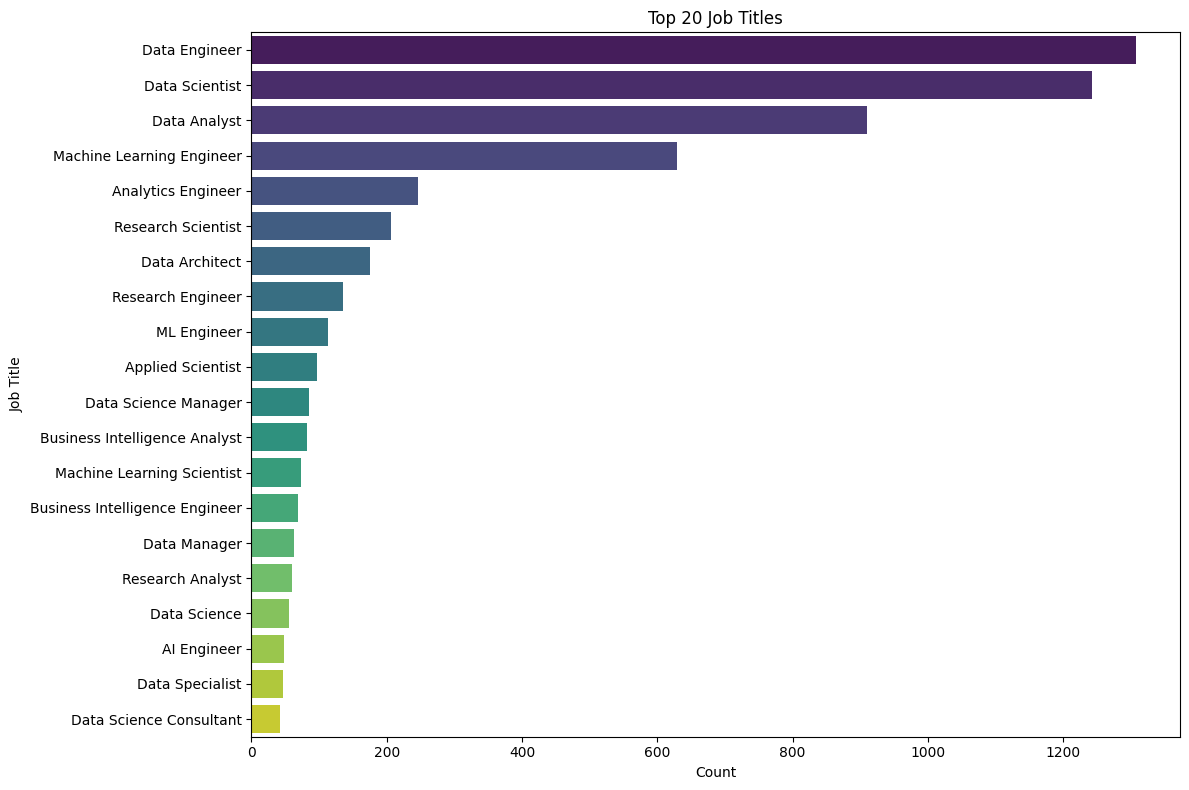

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x=job_title_counts.head(20).values,y=job_title_counts.head(20).index, palette="viridis", legend=False)
plt.title("Top 20 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.savefig("JOBs.png")
plt.show()

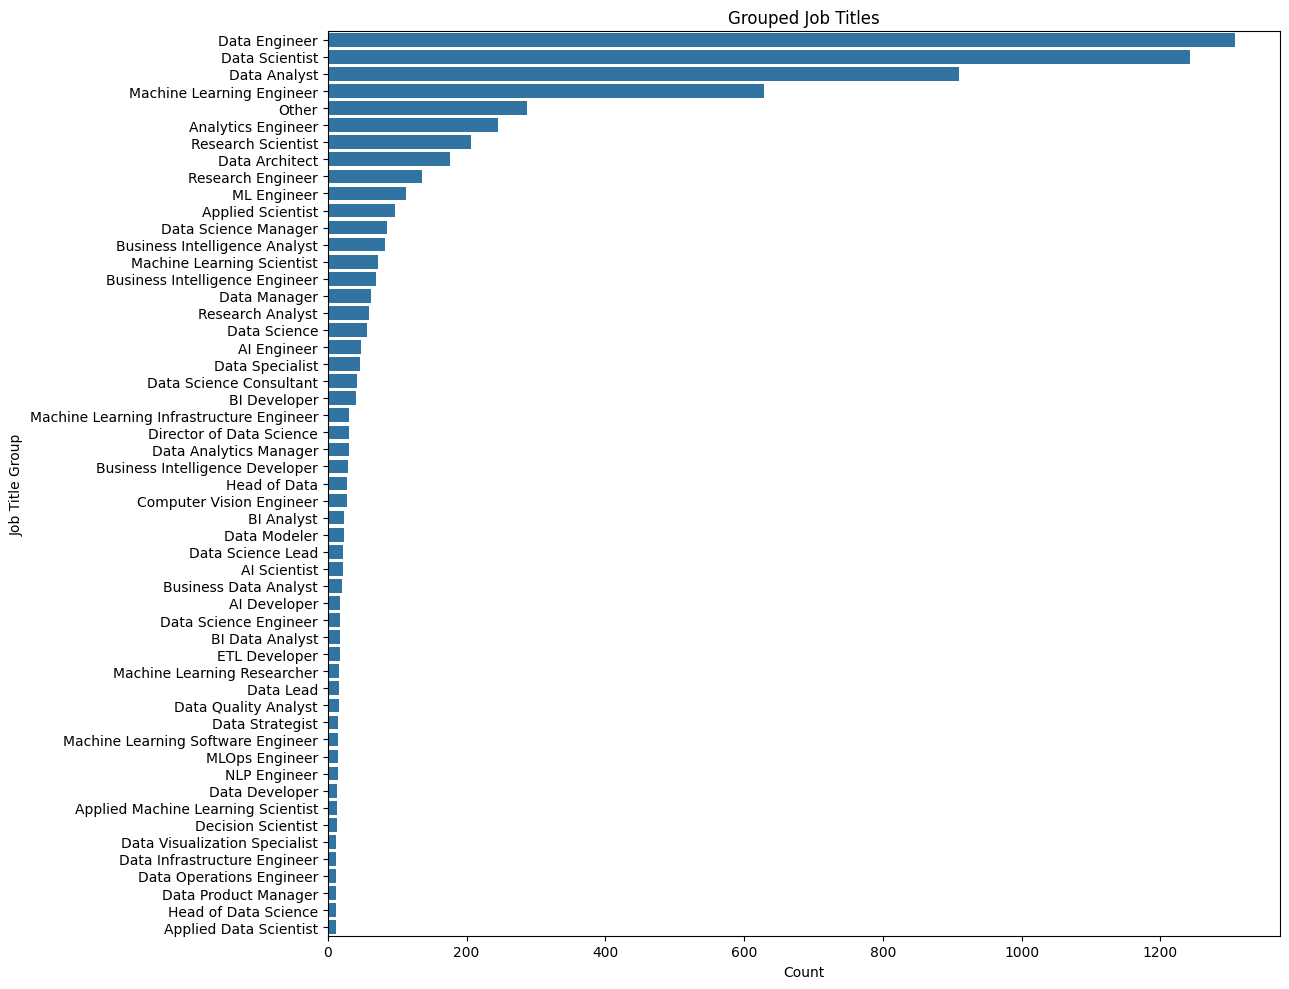

In [68]:
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if job_title_counts[x] > 10 else 'Other')
grouped_counts = df['job_title_grouped'].value_counts()

plt.figure(figsize=(13,10))
sns.barplot(x=grouped_counts.values, y=grouped_counts.index)
plt.title("Grouped Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title Group")
plt.tight_layout()
plt.savefig("jobsgroupd.png")
plt.show()

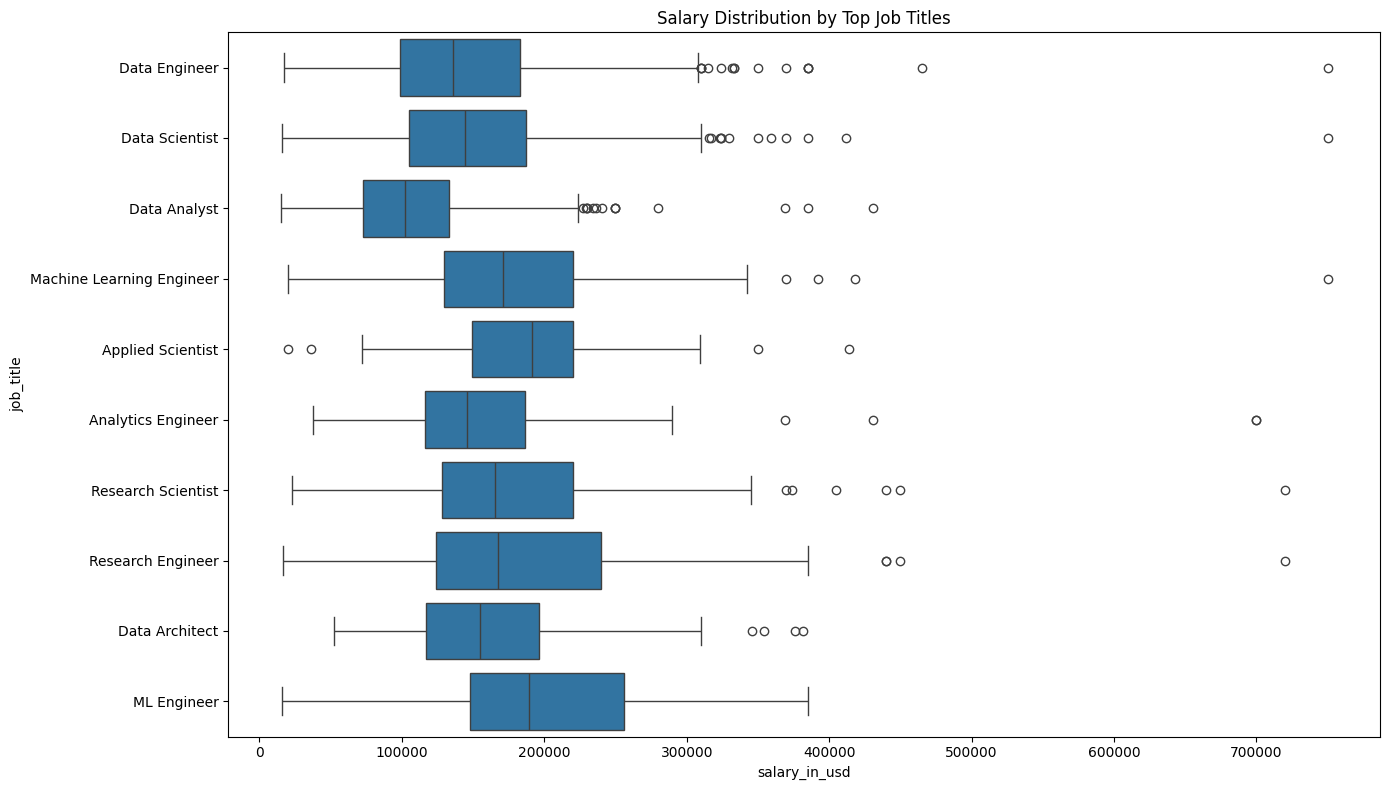

In [47]:
plt.figure(figsize=(14, 8))
top_jobs = job_title_counts.head(10).index
sns.boxplot(data=df[df['job_title'].isin(top_jobs)], x='salary_in_usd', y='job_title')
plt.title("Salary Distribution by Top Job Titles")
plt.tight_layout()
plt.show()

In [48]:
job_title_mapping = {
    'Data Scientist': [
        'Data Scientist', 'Applied Data Scientist', 'Data Science Practitioner',
        'Staff Data Scientist', 'Marketing Data Scientist', 'Data Science Engineer'
    ],
    'Data Analyst': [
        'Data Analyst', 'Business Data Analyst', 'Product Data Analyst',
        'Marketing Data Analyst', 'Finance Data Analyst', 'Compliance Data Analyst',
        'Financial Data Analyst', 'Staff Data Analyst', 'Insight Analyst'
    ],
    'Machine Learning Engineer': [
        'Machine Learning Engineer', 'ML Engineer', 'Machine Learning Software Engineer',
        'Machine Learning Researcher', 'Machine Learning Developer',
        'Machine Learning Scientist', 'Machine Learning Specialist',
        'Machine Learning Manager', 'Machine Learning Modeler',
        'Principal Machine Learning Engineer', 'Staff Machine Learning Engineer',
        'Head of Machine Learning', 'Lead Machine Learning Engineer',
        'Machine Learning Operations Engineer', 'Machine Learning Research Engineer'
    ],
    'BI Analyst': [
        'Business Intelligence Analyst', 'BI Analyst', 'BI Data Analyst',
        'BI Developer', 'BI Data Engineer', 'Business Intelligence Developer',
        'Business Intelligence Data Analyst', 'Business Intelligence Specialist',
        'Business Intelligence Manager'
    ],
    'Data Engineer': [
        'Data Engineer', 'Cloud Data Engineer', 'Software Data Engineer',
        'Data Infrastructure Engineer', 'Lead Data Engineer', 'ETL Developer',
        'ETL Engineer', 'Cloud Database Engineer', 'AWS Data Architect',
        'Azure Data Engineer', 'Consultant Data Engineer', 'Principal Data Engineer'
    ],
    'Data Architect': [
        'Data Architect', 'AI Architect', 'Big Data Architect', 'Cloud Data Architect',
        'Principal Data Architect'
    ],
    'Data Manager': [
        'Data Manager', 'Data Product Manager', 'Data Operations Manager',
        'Data Strategy Manager', 'Manager Data Management', 'Head of Data',
        'Director of Data Science', 'Managing Director Data Science'
    ],
    'Data Scientist Manager': [
        'Data Science Manager', 'Head of Data Science', 'Lead Data Scientist',
        'Data Science Lead', 'Principal Data Scientist', 'Data Science Director',
        'Data Science Tech Lead'
    ],
    'Researcher': [
        'Research Scientist', 'Research Engineer', 'AI Research Engineer',
        'Deep Learning Engineer', 'Deep Learning Researcher', 'Applied Machine Learning Scientist',
        'AI Scientist'
    ],
    'Others': []  # Everything not explicitly mapped
}
def map_job_title(original_title):
    for group, titles in job_title_mapping.items():
        if original_title in titles:
            return group
    return 'Others'



In [49]:
df['job_title_grouped'] = df['job_title'].apply(map_job_title)


C:\Users\manis\AppData\Local\Temp\ipykernel_23428\2040537248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='job_title_grouped', order=df['job_title_grouped'].value_counts().index, palette='Set2')


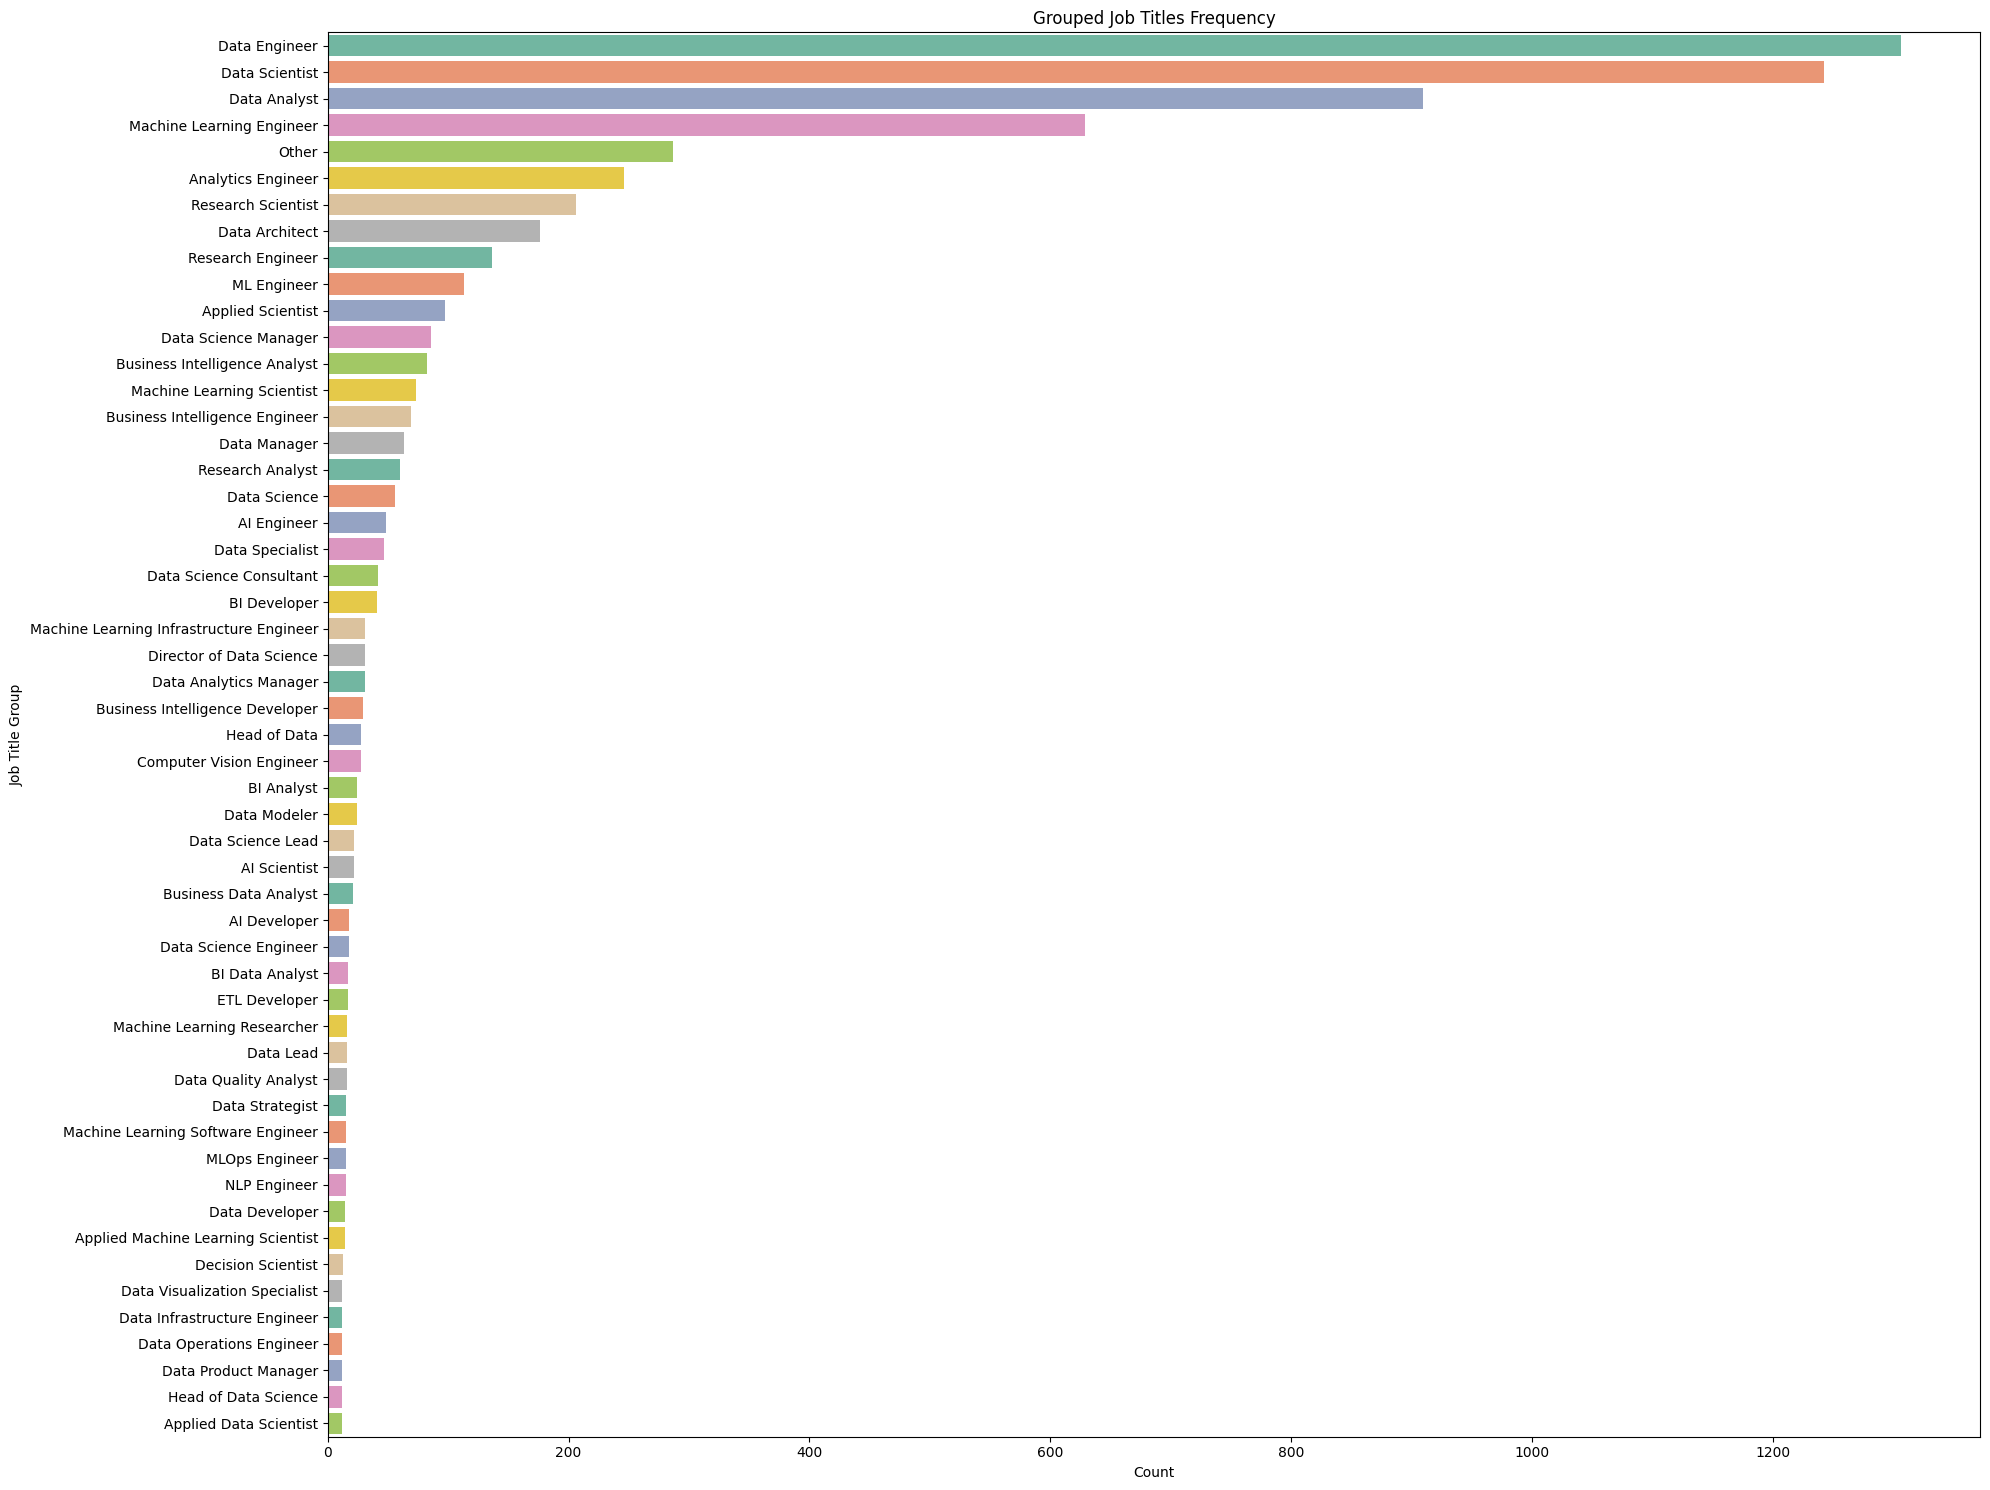

In [70]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df, y='job_title_grouped', order=df['job_title_grouped'].value_counts().index, palette='Set2')
plt.title('Grouped Job Titles Frequency')
plt.xlabel('Count')
plt.ylabel('Job Title Group')
plt.tight_layout()
plt.savefig("Groupd.png")
plt.show()


In [51]:
df['job_title_grouped'].unique()

array(['Data Engineer', 'Data Scientist', 'BI Analyst', 'Others',
       'Data Analyst', 'Data Manager', 'Machine Learning Engineer',
       'Data Scientist Manager', 'Researcher', 'Data Architect'],
      dtype=object)

C:\Users\manis\AppData\Local\Temp\ipykernel_23428\307893204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_title_grouped', y='salary_in_usd', palette='viridis')


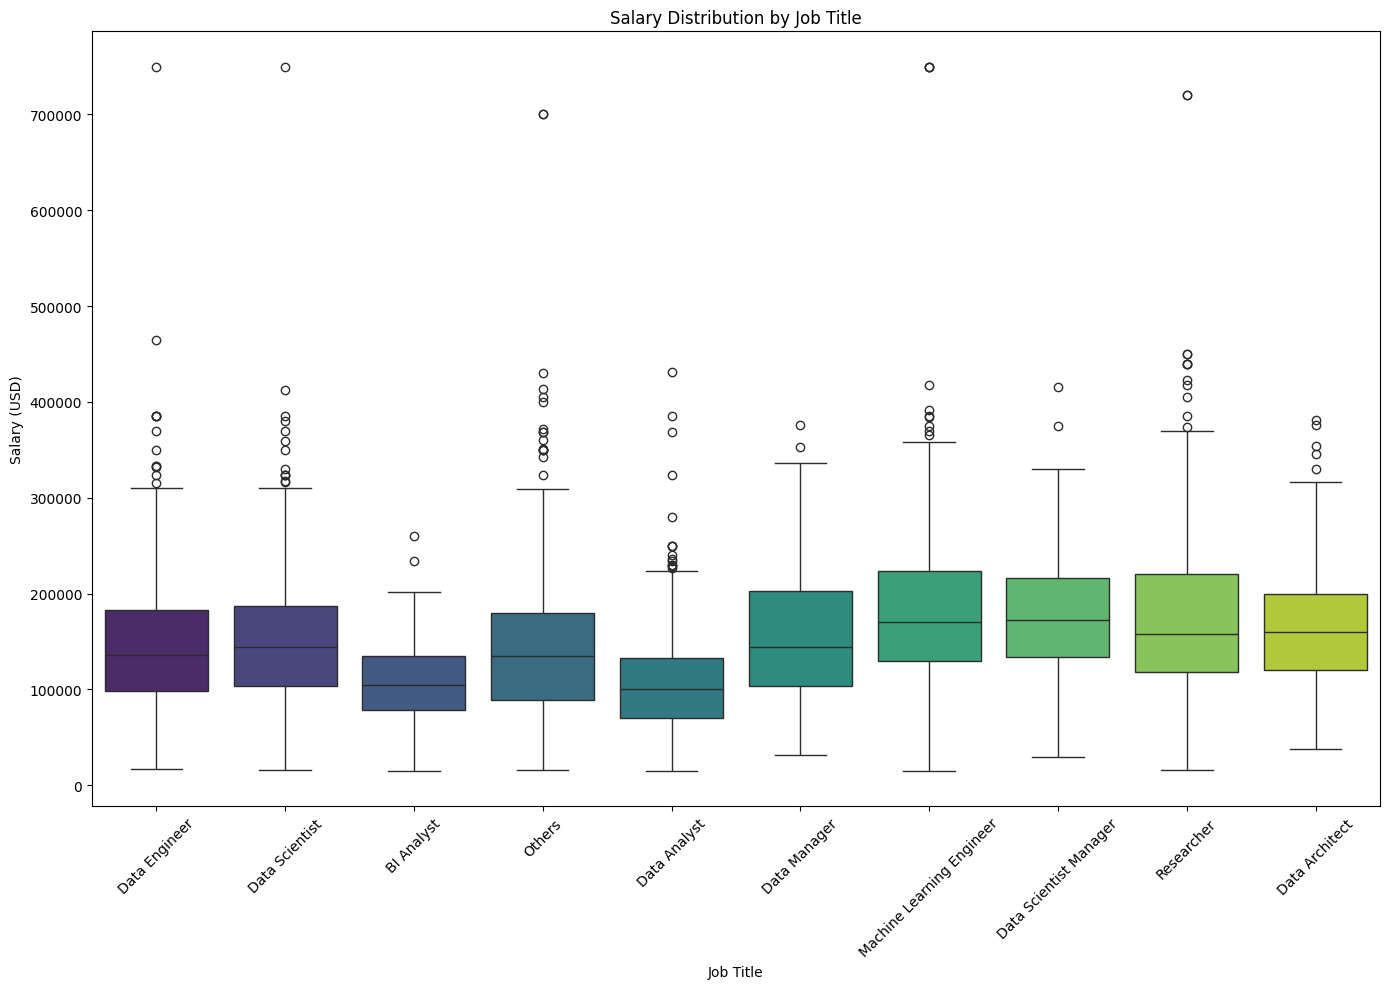

In [58]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df, x='job_title_grouped', y='salary_in_usd', palette='viridis')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.savefig("profilevssalary.jpg")
plt.show()


C:\Users\manis\AppData\Local\Temp\ipykernel_23428\754265106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set3')


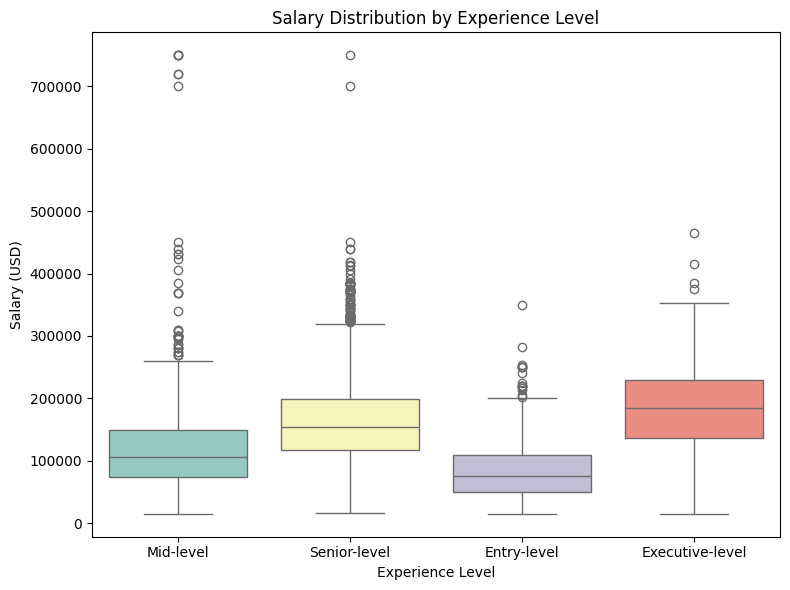

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set3')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.savefig("salaryvsexperience")
plt.show()

C:\Users\manis\AppData\Local\Temp\ipykernel_23428\2570605343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_locations, x='company_location', y='salary_in_usd', palette='coolwarm')


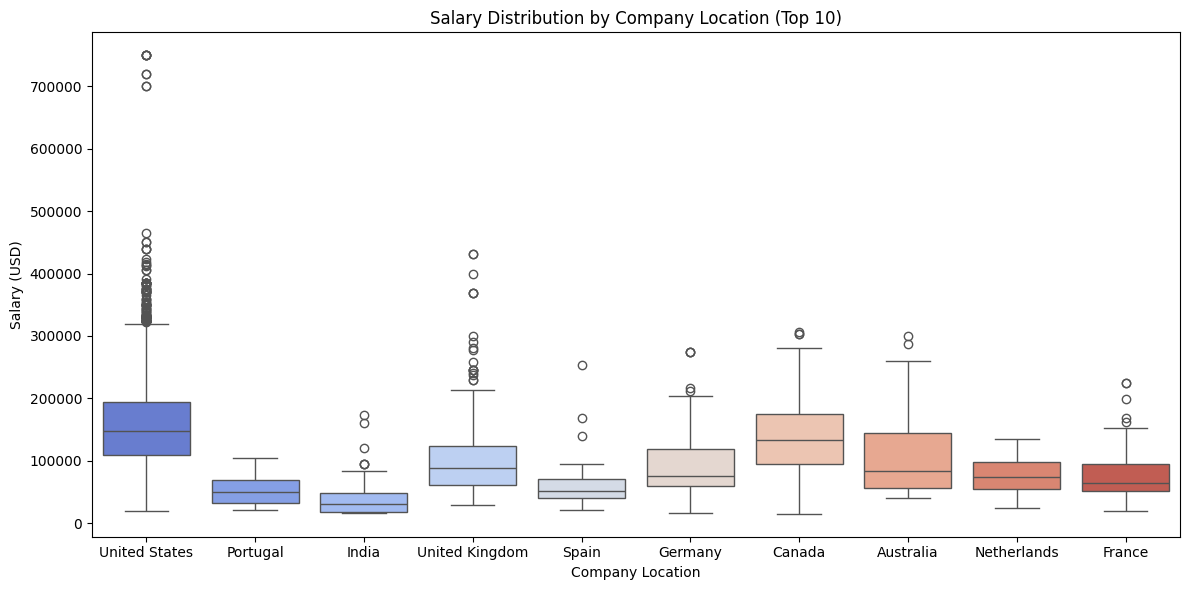

In [60]:
top_locations = df['company_location'].value_counts().head(10).index
df_top_locations = df[df['company_location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_locations, x='company_location', y='salary_in_usd', palette='coolwarm')
plt.title('Salary Distribution by Company Location (Top 10)')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.savefig("Locationvssalary")
plt.show()


C:\Users\manis\AppData\Local\Temp\ipykernel_23428\2800155039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='work_models', y='salary_in_usd', palette='Pastel1')


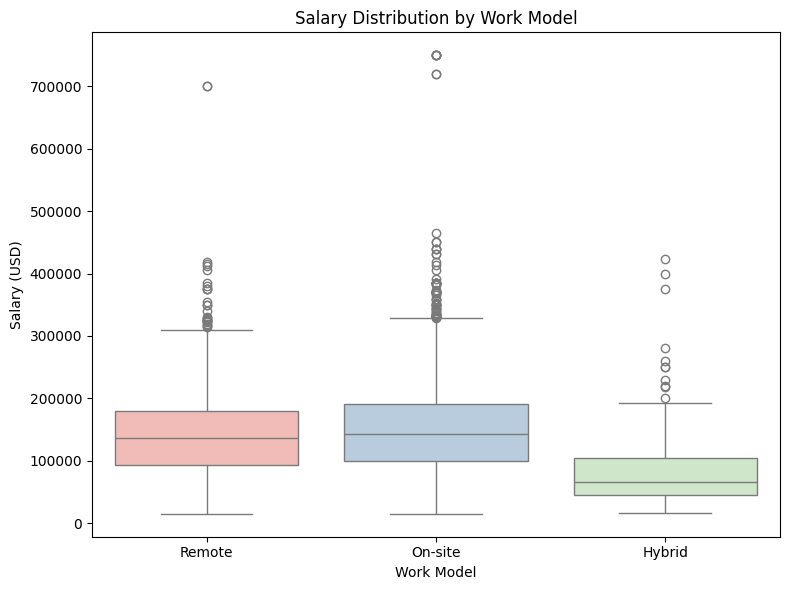

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='work_models', y='salary_in_usd', palette='Pastel1')
plt.title('Salary Distribution by Work Model')
plt.xlabel('Work Model')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.savefig("Workmodelvssalary.png")
plt.show()

In [62]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary_in_usd', 'company_location',
       'company_size', 'job_title_grouped'],
      dtype='object')

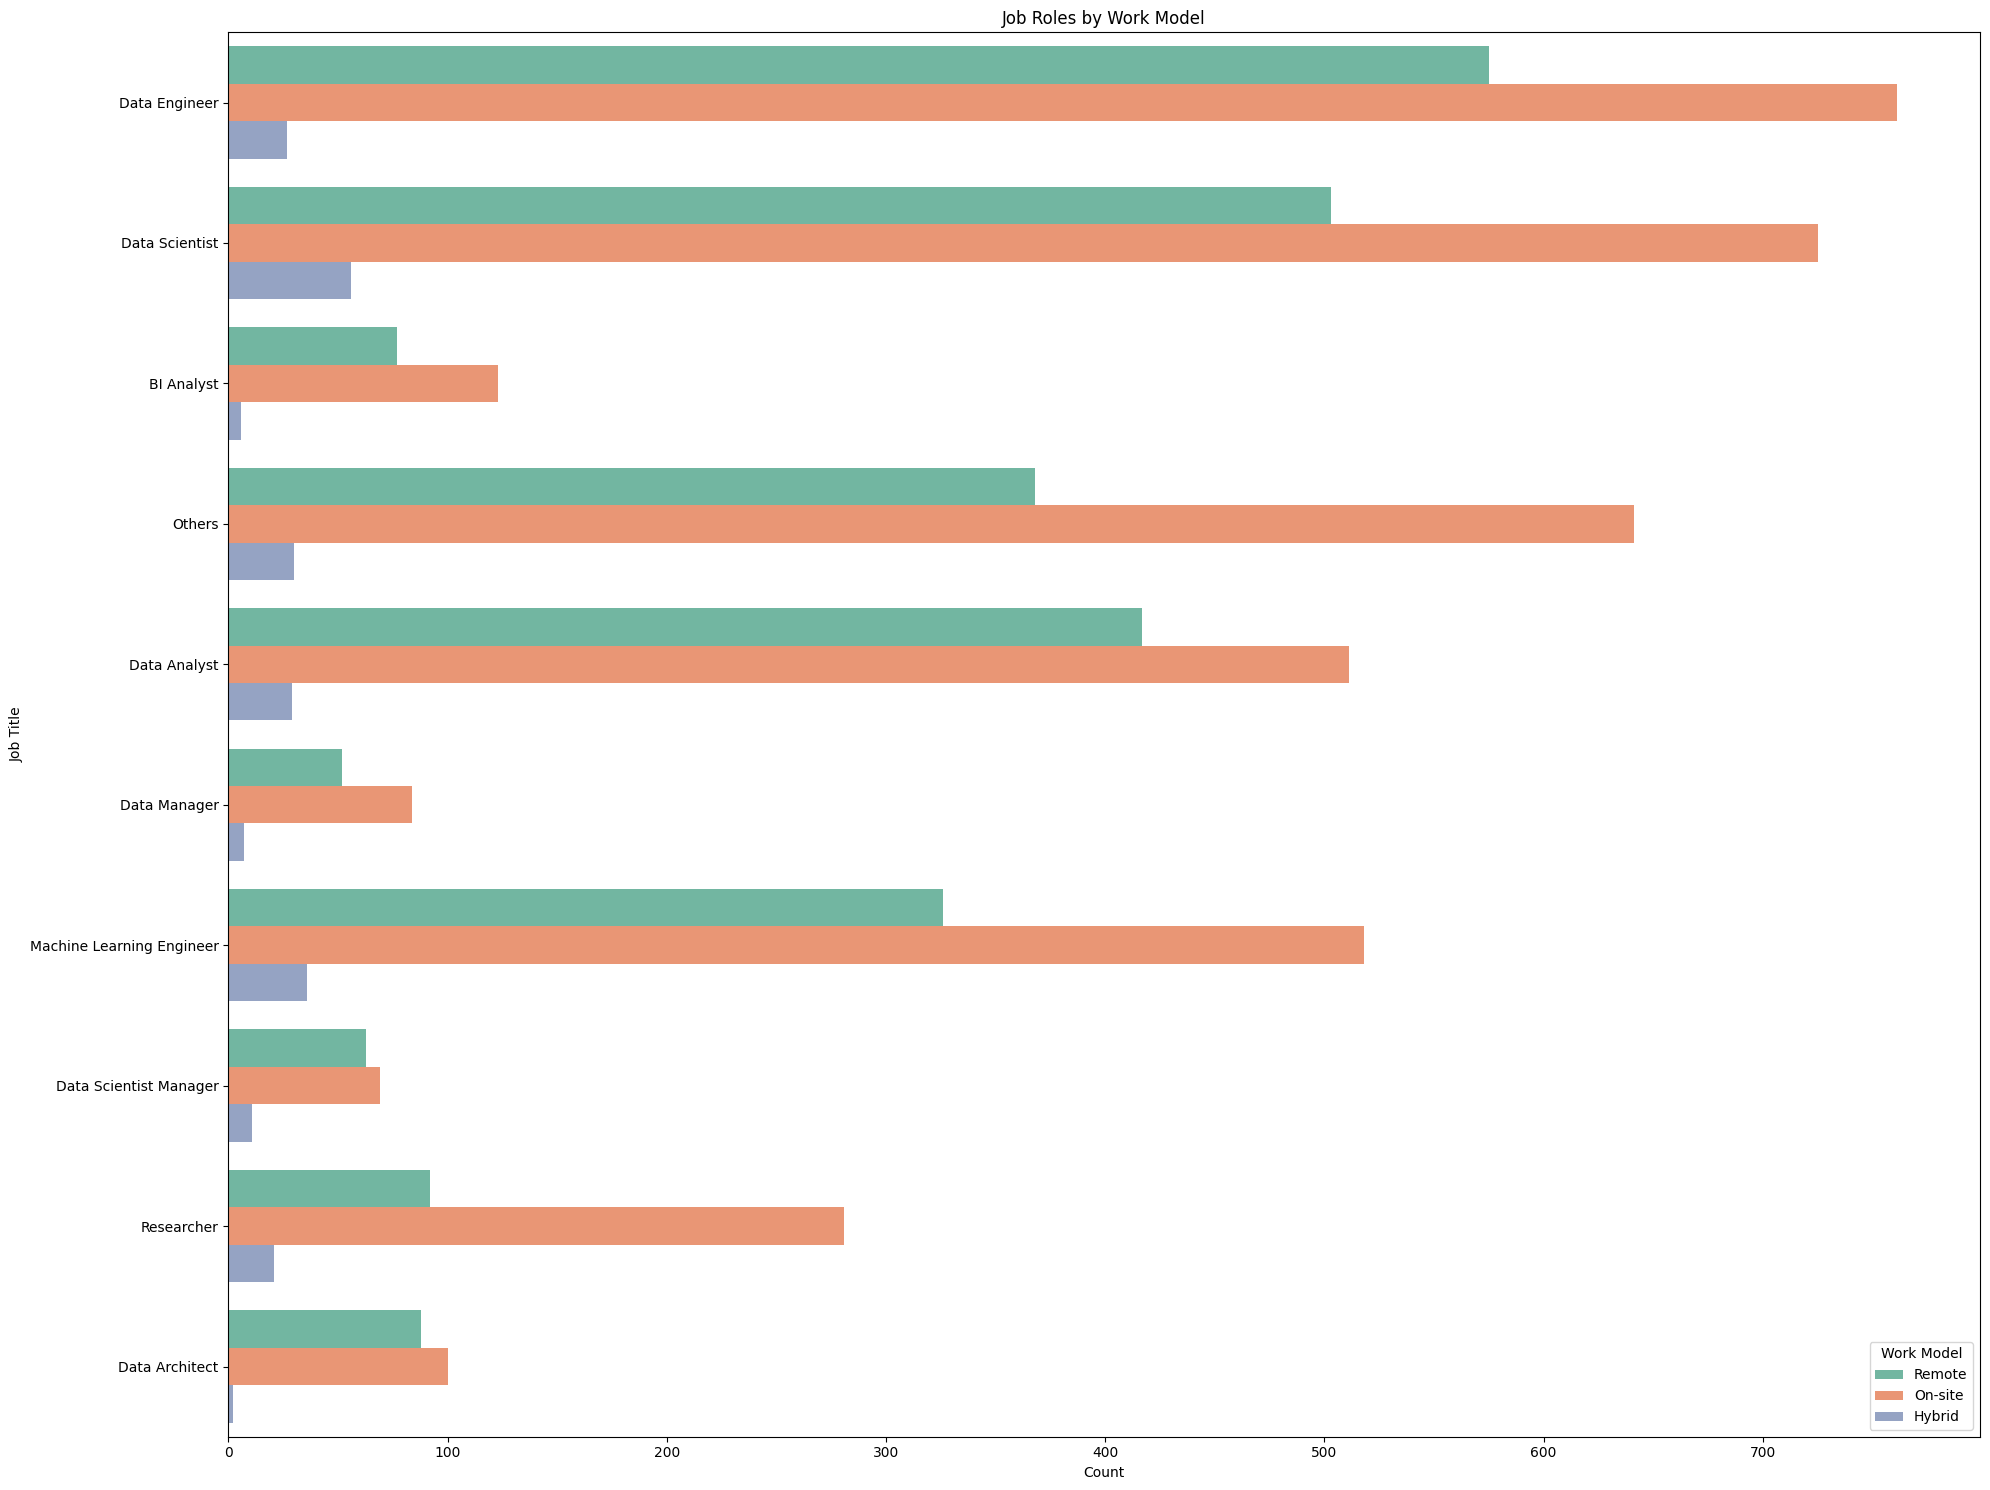

In [67]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, y='job_title_grouped', hue='work_models', palette='Set2')
plt.title('Job Roles by Work Model')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.legend(title='Work Model')
plt.tight_layout()
plt.savefig("workmodelvsjobs.png")
plt.show()
